<a href="https://colab.research.google.com/github/hanselkane/MachineLearning-Telyu/blob/main/Week%203/ML_Telyu_Week_3_KNN_DBSCAN_FRUIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [277]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting and visualizing data

In [278]:
import requests
import io
# Downloading the csv file from your GitHub account
url = 'https://raw.githubusercontent.com/hanselkane/MachineLearning-Telyu/main/Week%203/apples_and_oranges.csv'
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
fruits = pd.read_csv(io.StringIO(download.decode('utf-8')))
fruits.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [279]:
fruits['Class'].value_counts()

orange    20
apple     20
Name: Class, dtype: int64

In [280]:
apple_data=fruits[fruits['Class']=='orange']
orange_data=fruits[fruits['Class']=='apple']

In [281]:
apple_data.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
4,67,4.70,orange
9,65,4.27,orange


In [282]:
orange_data.head()

,Weight,Size,Class
3,72,5.85,apple
5,73,5.68,apple
6,70,5.56,apple
7,75,5.11,apple
8,74,5.36,apple


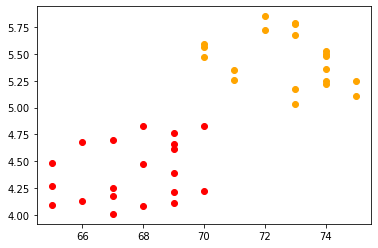

In [283]:
plt.scatter(orange_data['Weight'],orange_data['Size'],color="orange")
plt.scatter(apple_data['Weight'],apple_data['Size'],color="red")

In [284]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [285]:
X=fruits[['Weight','Size']]
Y=fruits['Class']
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=123,test_size=0.2)

In [286]:
X_train.describe()

,Weight,Size
count,32.000000,32.000000
mean,70.031250,4.843750
std,3.227746,0.548186
min,65.000000,4.010000
25%,67.000000,4.360000
50%,69.500000,4.795000
75%,73.000000,5.252500
max,75.000000,5.850000


In [287]:
knn=KNeighborsClassifier()
#train data
knn.fit(X_train,y_train)
#accuracy
knn.score(X_test,y_test)

0.625

In [288]:
prediction1=knn.predict([['5.5','74']])
prediction1[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


'orange'

In [289]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
  
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [290]:
# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [291]:
print(X_scaled.shape)
print(y_train.shape)

(32, 2)
(32,)


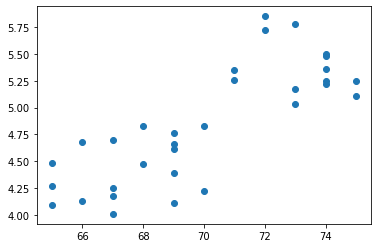

In [292]:
plt.scatter(X_train['Weight'],X_train['Size'])

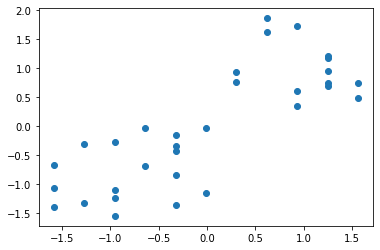

In [293]:
plt.scatter(X_scaled[:,0],X_scaled[:,1])

In [294]:
# print(X_scaled)
print(y_train)

13    orange
20    orange
8      apple
37     apple
24    orange
7      apple
18    orange
39     apple
3      apple
31    orange
21    orange
16    orange
25     apple
4     orange
26    orange
35    orange
29     apple
27    orange
14     apple
0     orange
9     orange
15    orange
30     apple
36    orange
32     apple
33     apple
22    orange
19     apple
17     apple
34    orange
28     apple
2     orange
Name: Class, dtype: object


In [295]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_train)
encodedLabel = le.transform(y_train)

print(encodedLabel)

[1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1]


In [296]:
# from sklearn.datasets import make_blobs
# centers = [[1, 1], [-1, -1], [1, -1]]
# X, labels_true = make_blobs(
#     n_samples=750, centers=centers, cluster_std=0.4, random_state=0
# )
# X

In [297]:
# Numpy array of all the cluster labels assigned to each data point
db = DBSCAN(eps=0.8, min_samples=3).fit(X_scaled)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(encodedLabel, labels))
print("Completeness: %0.3f" % metrics.completeness_score(encodedLabel, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(encodedLabel, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(encodedLabel, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(encodedLabel, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_scaled, y_train))

Estimated number of clusters: 2
Estimated number of noise points: 0
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.643


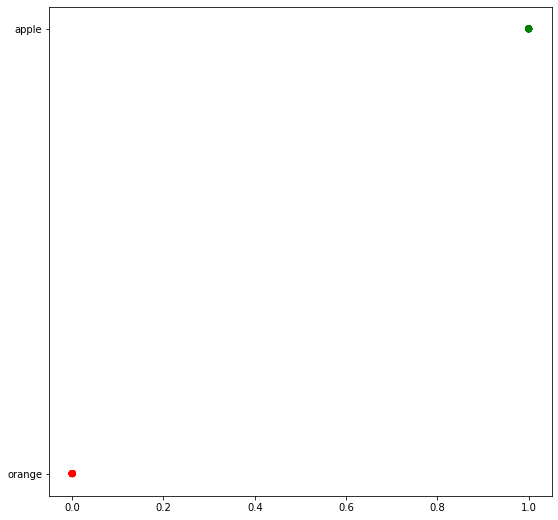

In [298]:
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

# Building the colour vector for each data point
cvec = [colours[label] for label in labels]

plt.figure(figsize =(9, 9))
plt.scatter(labels, y_train, c = cvec)

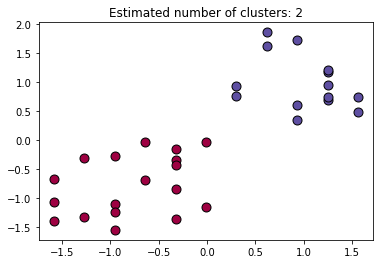

In [301]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X_scaled[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=9,
    )

    xy = X_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()